In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import wheel
import setuptools
import scipy
import lightgbm as lgb
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
df_name = input("Enter the name of the file: ")
df = pd.read_csv(df_name, sep='\t', encoding='unicode_escape')
# Dataset_08-29-2019.txt

Enter the name of the file: Dataset_08-29-2019.txt


In [6]:
#Functions shell
max_sent = df['Sentence #'].max()
print()

def otherCap(x):
    for letter in x:
        if letter.isupper():
            return 1
    return 0

def propVow(x):
    vowels = 'aeiouAEIOU'
    numVow = 0
    for letter in x:
        if letter in vowels:
            numVow += 1
    return numVow / len(x)

word_array = df.Word.unique().tolist()

def frontWord(x):
    if x > 0:
        return word_array.index(df['Word'][x-1])
    else:
        return
def backWord(x):
    if x < len(df.index) - 1:
        return word_array.index(df['Word'][x+1])
    else:
        return

tagArray = df.Tag.unique().tolist()
def Tag2Num(x):
    return tagArray.index(x)

AttributeError: 'float' object has no attribute 'round'

In [11]:
df['isFirstCap'] = df['Word'].apply(lambda x: 1 if x[0].isupper() else 0)

df['Length'] = df['Word'].apply(lambda x: len(x))

df['endY'] = df['Word'].apply(lambda x: 1 if x[-1] == 'y' else 0)

df['isNNP'] = df['POS'].apply(lambda x: 1 if x == 'NNP' else 0)

df['isJJ'] = df['POS'].apply(lambda x: 1 if x == 'JJ' else 0)

df['isCD'] = df['POS'].apply(lambda x: 1 if x == 'CD' else 0)

df['otherCap'] = df['Word'].apply(lambda x: otherCap(x))

df['endan'] = df['Word'].apply(lambda x: 1 if x[-2:len(x)] == 'an' else 0)

df['isNum'] = df['Word'].apply(lambda x: 1 if x.isnumeric() else 0)

df['endS'] = df['Word'].apply(lambda x: 1 if x[-1] == 's' else 0)

df['endish'] = df['Word'].apply(lambda x: 1 if x[-3:len(x)] == 'ish' else 0)

df['endese'] = df['Word'].apply(lambda x: 1 if x[-3:len(x)] == 'ese' else 0)

df['propVow'] = df['Word'].apply(lambda x: propVow(x))

#df['isTag'] = df['Tag'].apply(lambda x: 0 if x == 'O' else 1)
df['TagNum'] = df['Tag'].apply(lambda x: Tag2Num(x))

df['frontWord'] = df['Unnamed: 0'].apply(lambda x: frontWord(x))

df['backWord'] = df['Unnamed: 0'].apply(lambda x: backWord(x))

df

,Unnamed: 0,Sentence #,Word,POS,Tag,isFirstCap,Length,endY,isNNP,isJJ,...,otherCap,endan,isNum,endS,endish,endese,propVow,TagNum,frontWord,backWord
0,0,1.0,Thousands,NNS,O,1,9,0,0,0,...,1,0,0,1,0,0,0.333333,0,NaN,1.0
1,1,1.0,of,IN,O,0,2,0,0,0,...,0,0,0,0,0,0,0.500000,0,0.0,2.0
2,2,1.0,demonstrators,NNS,O,0,13,0,0,0,...,0,0,0,1,0,0,0.307692,0,1.0,3.0
3,3,1.0,have,VBP,O,0,4,0,0,0,...,0,0,0,0,0,0,0.500000,0,2.0,4.0
4,4,1.0,marched,VBN,O,0,7,0,0,0,...,0,0,0,0,0,0,0.285714,0,3.0,5.0
5,5,1.0,through,IN,O,0,7,0,0,0,...,0,0,0,0,0,0,0.285714,0,4.0,6.0
6,6,1.0,London,NNP,B-geo,1,6,0,1,0,...,1,0,0,0,0,0,0.333333,1,5.0,7.0
7,7,1.0,to,TO,O,0,2,0,0,0,...,0,0,0,0,0,0,0.500000,0,6.0,8.0
8,8,1.0,protest,VB,O,0,7,0,0,0,...,0,0,0,0,0,0,0.285714,0,7.0,9.0
9,9,1.0,the,DT,O,0,3,0,0,0,...,0,0,0,0,0,0,0.333333,0,8.0,10.0


In [14]:
data_test = df[['isFirstCap', 'Length', 'endY', 'isNNP', 'isJJ', 'isCD', 'otherCap', 'endan',
           'isNum', 'endS', 'endish', 'endese', 'propVow', 'frontWord', 'backWord']].values
valid_test = df['TagNum'].values

In [6]:
#Loading the model
light_model = lgb.Booster(model_file = 'model.txt')
y_pred2 = light_model.predict(data_test)
y_hat2 = [np.argmax(line) for line in y_pred2]
accuracy = accuracy_score(y_hat2, valid_test)
cm = confusion_matrix(valid_test, y_hat2)
print("Accuracy = " + str(accuracy))
print(cm)

Accuracy = 0.9455117062922266
[[55871    30    72    46     2    50    23    24     1     0    73     0
      9     5     1     1     9]
 [   79  1594    29    75    12   135    38    24     0     0    81     0
      1     0     1     1     0]
 [   56   192   901    18     4    32     4     4     0     0    16     2
      0     0     0     0     1]
 [   23   104     6   783     0    40    24    20     0     0   103     0
      0     2     1     1     0]
 [   29    34     3    10   220     8    24     9     0     0    75     2
      0     0     0     0     0]
 [   73   286    22   102    10   604    48    20     1     0    70     0
      0     0     0     1     0]
 [  132    40     4    48    36    24   438    39     0     3   158     1
      0     0     0     1     2]
 [  237    59     3    11     3    28     1   799     0     0     7     0
     12     0     0     0     0]
 [    4     5     2     2     1     5     2     0    31     0     1     0
      0     0     0     0     0]
 [    4

Confusion Matrix of Tag Data


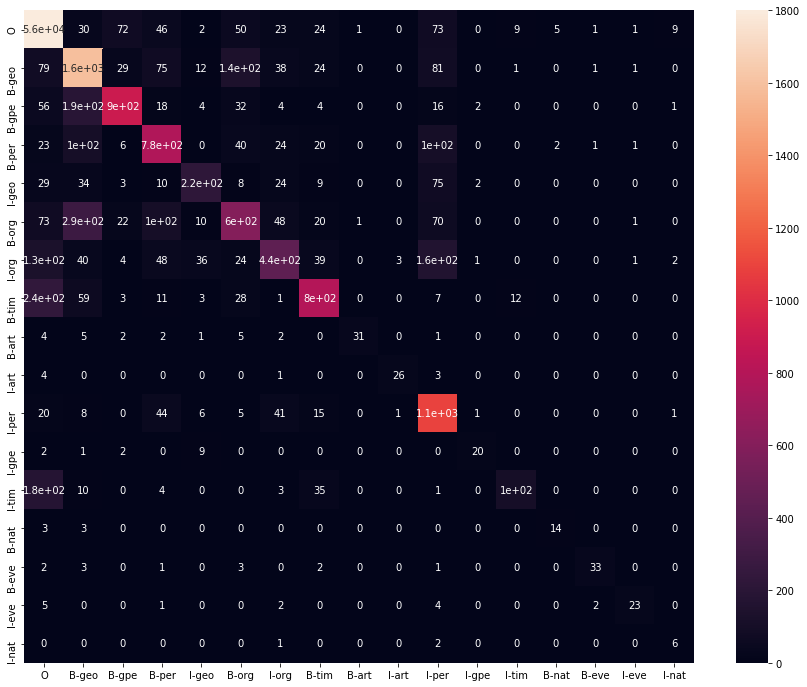

In [7]:
fig = plt.figure(figsize = (15, 12))
sn.heatmap(cm, vmin = 0, vmax = 1800, annot = True, xticklabels = tagArray, yticklabels = tagArray)
print('Confusion Matrix of Tag Data')